In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
project_path = '/gdrive/My Drive/Colab Notebooks/pneumonia'
%cd '/gdrive/My Drive/Colab Notebooks/pneumonia'

/gdrive/My Drive/Colab Notebooks/pneumonia


In [ ]:
!ls

Dataset  out  out_2  out_3  out_4  pneumonia_v1.ipynb  pneumonia_v2.ipynb


In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import pathlib
import random

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
dataset_folder_path = project_path + "/Dataset"

normal_dataset_name = "Normal"
pneumonia_dataset_name = "Viral Pneumonia"
covid_dataset_name = "COVID"

In [ ]:
def create_nn_model():
  model = keras.Sequential()
  model.add(layers.Flatten(input_shape=(512, 512)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(512, activation=tf.nn.relu))
  model.add(layers.Dense(256, activation=tf.nn.relu))
  model.add(layers.Dense(128, activation=tf.nn.relu))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(3, activation=tf.nn.softmax))

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
nn_model = create_nn_model()

In [ ]:
data_dir = pathlib.Path(dataset_folder_path)

In [ ]:
normal_images_paths_1 = list(data_dir.glob(normal_dataset_name + '/*'))
pneumonia_images_paths_1 = list(data_dir.glob(pneumonia_dataset_name + '/*'))
covid_images_paths_1 = list(data_dir.glob(covid_dataset_name + '/*'))

In [ ]:
normal_images_paths = normal_images_paths_1[:500]
covid_images_paths = covid_images_paths_1[:300]
pneumonia_images_paths = pneumonia_images_paths_1[:400]

In [ ]:
normal_images_paths[:10]

[PosixPath('/gdrive/My Drive/Colab Notebooks/pneumonia/Dataset/Normal/Normal-9099.png'),
 PosixPath('/gdrive/My Drive/Colab Notebooks/pneumonia/Dataset/Normal/Normal-91.png'),
 PosixPath('/gdrive/My Drive/Colab Notebooks/pneumonia/Dataset/Normal/Normal-910.png'),
 PosixPath('/gdrive/My Drive/Colab Notebooks/pneumonia/Dataset/Normal/Normal-9100.png'),
 PosixPath('/gdrive/My Drive/Colab Notebooks/pneumonia/Dataset/Normal/Normal-9102.png'),
 PosixPath('/gdrive/My Drive/Colab Notebooks/pneumonia/Dataset/Normal/Normal-9103.png'),
 PosixPath('/gdrive/My Drive/Colab Notebooks/pneumonia/Dataset/Normal/Normal-9104.png'),
 PosixPath('/gdrive/My Drive/Colab Notebooks/pneumonia/Dataset/Normal/Normal-9105.png'),
 PosixPath('/gdrive/My Drive/Colab Notebooks/pneumonia/Dataset/Normal/Normal-9106.png'),
 PosixPath('/gdrive/My Drive/Colab Notebooks/pneumonia/Dataset/Normal/Normal-9107.png')]

In [ ]:
len(normal_images_paths)

500

In [ ]:
len(pneumonia_images_paths)

400

In [ ]:
len(covid_images_paths)

300

In [ ]:
def create_images_dataframe(images_path, tag):
    items = [];
    
    for image_path in images_path:
      image = keras.preprocessing.image.load_img(
          image_path, color_mode='grayscale', target_size=(512, 512),
          interpolation='nearest'
      )

      image = keras.preprocessing.image.img_to_array(image)
      image = np.reshape(image, (512, 512))
      item = [(image, tag)]
      items = items + item

    return items

In [ ]:
normal_dataset = create_images_dataframe(normal_images_paths, 0)

In [ ]:
pneumonia_dataset = create_images_dataframe(pneumonia_images_paths, 1)

In [ ]:
covid_dataset = create_images_dataframe(covid_images_paths, 2)

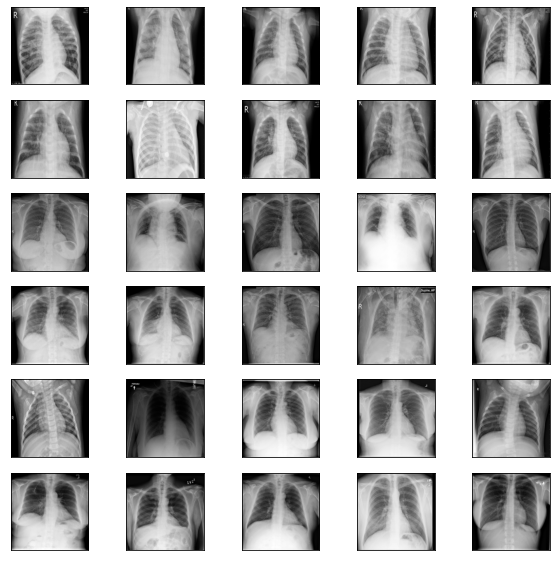

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(30):
  plt.subplot(6,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  if i < 10:
    plt.imshow(pneumonia_dataset[i][0], cmap="gray")
  elif i >= 10 and i < 20:
    plt.imshow(covid_dataset[i][0], cmap="gray")
  else:
    plt.imshow(normal_dataset[i][0], cmap="gray")

In [ ]:
complete_dataset = normal_dataset + pneumonia_dataset + covid_dataset
random.shuffle(complete_dataset)

X = [i[0] for i in complete_dataset] 
y = [i[1] for i in complete_dataset]

In [ ]:
print(len(X))

1200


In [ ]:
X_train, X_test, y_train, y_test = X[:1000], X[1000:], y[:1000], y[1000:]

In [ ]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [ ]:
print(len(X_train))
print(len(y_train))

1000
1000


In [ ]:
X_train.shape

(1000, 512, 512)

In [ ]:
nn_model.fit(X_train, y_train, epochs=16)

Epoch 1/16
32/32 [==============================] - 46s 1s/step - loss: 0.7603 - accuracy: 0.6970
Epoch 2/16
32/32 [==============================] - 40s 1s/step - loss: 0.5572 - accuracy: 0.7720
Epoch 3/16
32/32 [==============================] - 40s 1s/step - loss: 0.5124 - accuracy: 0.7980
Epoch 4/16
32/32 [==============================] - 40s 1s/step - loss: 0.4761 - accuracy: 0.8000
Epoch 5/16
32/32 [==============================] - 40s 1s/step - loss: 0.4819 - accuracy: 0.7940
Epoch 6/16
32/32 [==============================] - 40s 1s/step - loss: 0.4208 - accuracy: 0.8340
Epoch 7/16
32/32 [==============================] - 40s 1s/step - loss: 0.3941 - accuracy: 0.8350
Epoch 8/16
32/32 [==============================] - 40s 1s/step - loss: 0.3811 - accuracy: 0.8480
Epoch 9/16
32/32 [==============================] - 40s 1s/step - loss: 0.3500 - accuracy: 0.8690
Epoch 10/16
32/32 [==============================] - 40s 1s/step - loss: 0.3748 - accuracy: 0.8470
Epoch 11/16
32/32 [

In [ ]:
test_loss, test_acc = nn_model.evaluate(X_test, y_test)
print("Accuracy: ", test_acc)

7/7 [==============================] - 2s 210ms/step - loss: 0.4305 - accuracy: 0.8350
Accuracy:  0.8349999785423279


In [ ]:
nn_model.save(project_path + "/out_3")

INFO:tensorflow:Assets written to: /gdrive/My Drive/Colab Notebooks/pneumonia/out_3/assets


In [ ]:
nn_model2 = keras.models.load_model(project_path + "/out/" )

In [ ]:
normal_test_path = normal_images_paths[random.randrange(0, 200)]
normal_image_test = keras.preprocessing.image.load_img(
    normal_test_path, color_mode='grayscale', target_size=(512, 512),
    interpolation='nearest'
)

normal_image_test = keras.preprocessing.image.img_to_array(normal_image_test)
normal_image_test = np.reshape(normal_image_test, (512, 512))

In [ ]:
pneumonia_test_path = pneumonia_images_paths[random.randrange(0, 200)]
pneumonia_image_test = keras.preprocessing.image.load_img(
    pneumonia_test_path, color_mode='grayscale', target_size=(512, 512),
    interpolation='nearest'
)

pneumonia_image_test = keras.preprocessing.image.img_to_array(pneumonia_image_test)
pneumonia_image_test = np.reshape(pneumonia_image_test, (512, 512))

In [ ]:
covid_test_path = covid_images_paths[random.randrange(0, 200)]
covid_image_test = keras.preprocessing.image.load_img(
    covid_test_path, color_mode='grayscale', target_size=(512, 512),
    interpolation='nearest'
)

covid_image_test = keras.preprocessing.image.img_to_array(covid_image_test)
covid_image_test = np.reshape(covid_image_test, (512, 512))

Normal


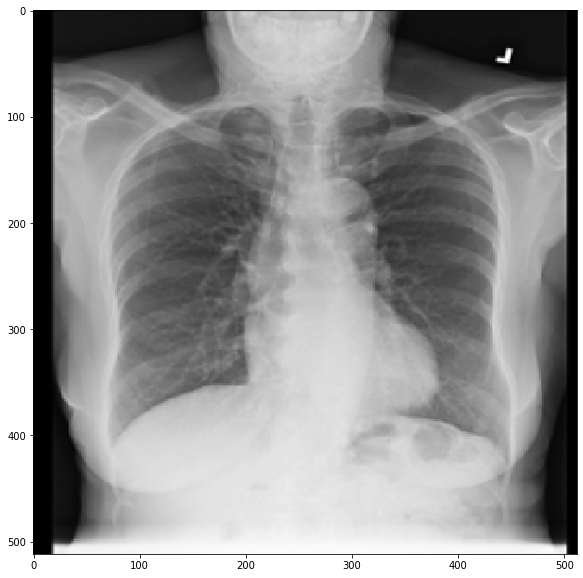

In [ ]:
#Should to print normal
predict = nn_model2.predict(np.array([normal_image_test]))
plt.figure(figsize=(10, 10))
plt.imshow(normal_image_test, cmap="gray")

if np.argmax(predict[0]) == 0:
  print("Normal")
elif np.argmax(predict[0]) == 1:
  print("Pneumonia")
else:
  print("Covid")

Pneumonia


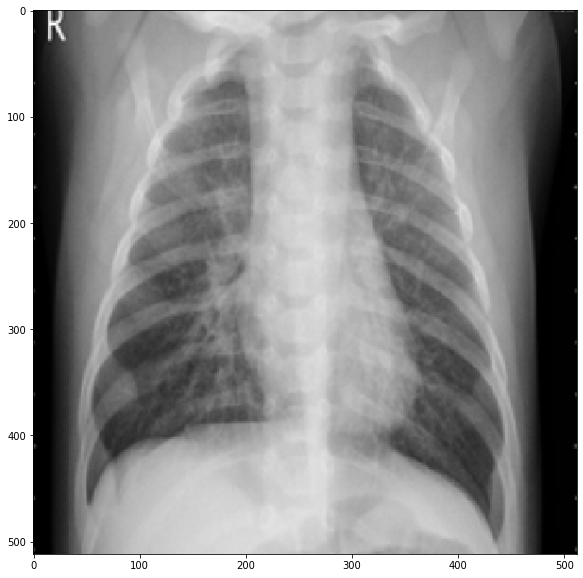

In [ ]:
#Should to print pneumonia
predict = nn_model2.predict(np.array([pneumonia_image_test]))
plt.figure(figsize=(10, 10))
plt.imshow(pneumonia_image_test, cmap="gray")

if np.argmax(predict[0]) == 0:
  print("Normal")
elif np.argmax(predict[0]) == 1:
  print("Pneumonia")
else:
  print("Covid")

Covid


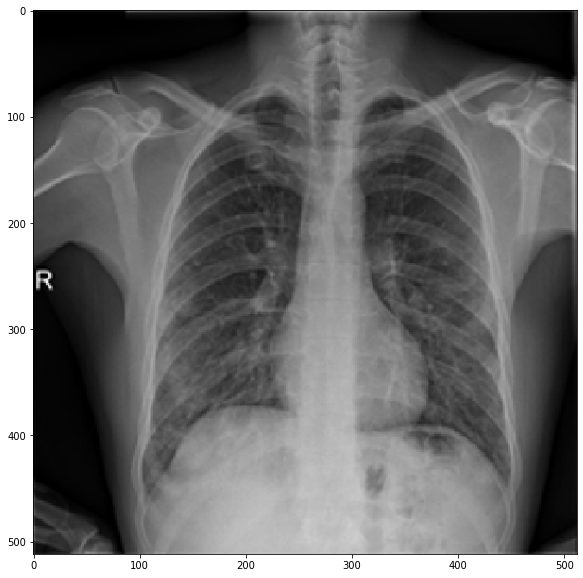

In [ ]:
#Should to print covid
predict = nn_model2.predict(np.array([covid_image_test]))
plt.figure(figsize=(10, 10))
plt.imshow(covid_image_test, cmap="gray")

if np.argmax(predict[0]) == 0:
  print("Normal")
elif np.argmax(predict[0]) == 1:
  print("Pneumonia")
else:
  print("Covid")

Prediction: Normal
Real: Normal


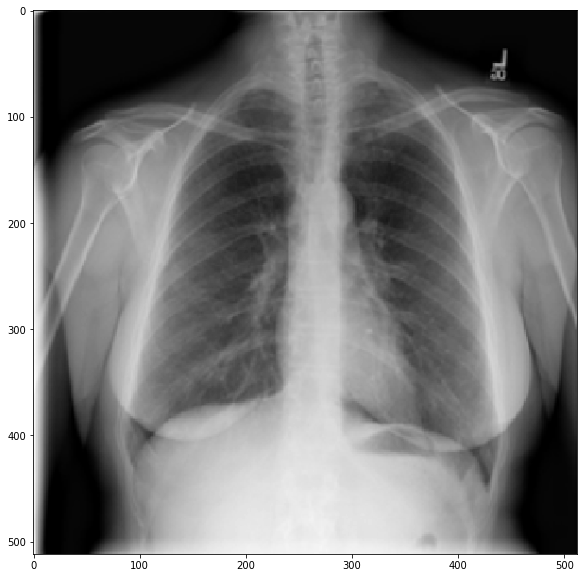

In [ ]:
image_index = random.randrange(0, 200)
predict = nn_model.predict(np.array([X_test[image_index]]))

plt.figure(figsize=(10, 10))
plt.imshow(X_test[image_index], cmap="gray")

if np.argmax(predict[0]) == 0:
  print("Prediction: Normal")
elif np.argmax(predict[0]) == 1:
  print("Prediction: Pneumonia")
else:
  print("Prediction: Covid")

if y_test[image_index] == 0:
  print("Real: Normal")
elif y_test[image_index] == 1:
  print("Real: Pneumonia")
else:
  print("Real: Covid")

In [ ]:
normal_images_paths = "/gdrive/My Drive/Colab Notebooks/pneumonia/Dataset/Normal/Normal-9099.png"

In [ ]:
normal_image_test = keras.preprocessing.image.load_img(
    normal_images_paths, color_mode='grayscale', target_size=(512, 512),
    interpolation='nearest'
)

In [ ]:
normal_image_test = keras.preprocessing.image.img_to_array(normal_image_test)

In [ ]:
normal_image_test = np.reshape(normal_image_test, (512, 512))

In [ ]:
predict = nn_model2.predict(np.array([normal_image_test]))

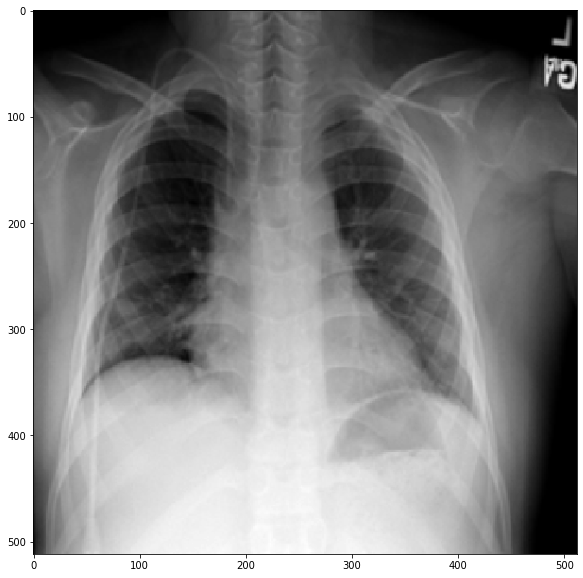

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(normal_image_test, cmap="gray")

In [ ]:
if np.argmax(predict[0]) == 0:
  print("Normal")
elif np.argmax(predict[0]) == 1:
  print("Pneumonia")
else:
  print("Covid")

Normal


In [ ]:
normal_test_path = normal_images_paths[random.randrange(0, 200)]
normal_image_test = keras.preprocessing.image.load_img(
    normal_test_path, color_mode='grayscale', target_size=(512, 512),
    interpolation='nearest'
)

normal_image_test = keras.preprocessing.image.img_to_array(normal_image_test)
normal_image_test = np.reshape(normal_image_test, (512, 512))

In [ ]:
predict = nn_model2.predict(np.array([normal_image_test]))
plt.figure(figsize=(10, 10))
plt.imshow(normal_image_test, cmap="gray")

if np.argmax(predict[0]) == 0:
  print("Normal")
elif np.argmax(predict[0]) == 1:
  print("Pneumonia")
else:
  print("Covid")

In [ ]:
!pip install joblib

In [ ]:
from sklearn.externals import joblib

ImportError: ignored

In [ ]:
import joblib

In [ ]:
joblib.dump(nn_model,project_path+'/out_2/model_joblib1')

INFO:tensorflow:Assets written to: ram://b758d1fc-9017-4b9a-8b47-13bb136b5dd7/assets


['/gdrive/My Drive/Colab Notebooks/pneumonia/out_2/model_joblib1']

In [ ]:
import pickle

In [ ]:
with open(project_path+'//out_2//model_pickle1','wb') as f:
  pickle.dump(nn_model,f)

INFO:tensorflow:Assets written to: ram://cecea73c-bab6-44ae-8e6d-03d0204e2a5c/assets


In [ ]:
nn_model2 = keras.models.load_model(project_path + "/out/" )

In [ ]:
#Test
tf.saved_model.save(nn_model,project_path+'/out_4/')
#nn_model.saved

INFO:tensorflow:Assets written to: /gdrive/My Drive/Colab Notebooks/pneumonia/out_4/assets


In [ ]:
#model to json
#seralize model
model_json = nn_model.to_json()
with open(project_path+"/out_5/model.json","w") as json_file:
  json_file.write(model_json)

In [ ]:
#seralize weights
nn_model.save_weights(project_path+"/out_5/model.h5")